In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
FOLDER = "out/normalized"
OUT = "out/precision-loo"
DATA_BASE = ["Chembl28CCandD-loocv", "global-loocv", "e-loocv", "gpcr-loocv", "ic-loocv", "nr-loocv"]
FINGERPRINTS = ["ecfp4", "fcfp4", "maccs"]

### Import df

In [14]:
def import_df(file_path):
    df = pd.read_csv(file_path)
    df['TP'] = df['TP'].astype(int)
    df['Score'] = df['Score'].astype(float)
    return df

### Calculo Precision

In [15]:
def precision(df):
    df_sorted = df.sort_values('Score', ascending=True)
    l = len(df_sorted)
    df_sorted['Precision'] = [np.sum(df_sorted['TP'][i:]) / (l - i) for i in range(l)]
    df_sorted = df_sorted[df_sorted['Score'] >= 0]
    # Export
    return df_sorted[["Score", "Precision"]]

### Procesar Precisiones

In [16]:
for db in DATA_BASE:
    for fingerprint in FINGERPRINTS:
        print(f"En: {db}: {fingerprint}")
        file_path = f"{FOLDER}/{db}_{fingerprint}_normalized.csv"
        # Importar
        df = import_df(file_path)
        # Calcular
        df = precision(df)
        df.to_csv(f"{OUT}/{db}_{fingerprint}_precision.csv", index=False)

En: Chembl28CCandD-loocv: ecfp4
En: Chembl28CCandD-loocv: fcfp4
En: Chembl28CCandD-loocv: maccs
En: global-loocv: ecfp4
En: global-loocv: fcfp4
En: global-loocv: maccs
En: e-loocv: ecfp4
En: e-loocv: fcfp4
En: e-loocv: maccs
En: gpcr-loocv: ecfp4
En: gpcr-loocv: fcfp4
En: gpcr-loocv: maccs
En: ic-loocv: ecfp4
En: ic-loocv: fcfp4
En: ic-loocv: maccs
En: nr-loocv: ecfp4
En: nr-loocv: fcfp4
En: nr-loocv: maccs


### Log de X

In [21]:
for db in DATA_BASE:
    for fingerprint in FINGERPRINTS:
        print(f"En: {db}: {fingerprint}")
        file_path = f"{OUT}/{db}_{fingerprint}_precision.csv"
        # Importar
        df = pd.read_csv(file_path)
        df = df[df['Score'] != 0]
        df['Score'] = df['Score'].astype(float)
        # Calcular
        df['Score_log'] = np.log(df['Score'])
        # Ordenar
        df = df[['Score_log', 'Precision']]
        df = df.rename(columns={'Score_log': 'Score'})
        df.to_csv(f"out/precision-loo-log-x/{db}_{fingerprint}_precision_log_x.csv", index=False)

En: Chembl28CCandD-loocv: ecfp4
En: Chembl28CCandD-loocv: fcfp4
En: Chembl28CCandD-loocv: maccs
En: global-loocv: ecfp4
En: global-loocv: fcfp4
En: global-loocv: maccs
En: e-loocv: ecfp4
En: e-loocv: fcfp4
En: e-loocv: maccs
En: gpcr-loocv: ecfp4
En: gpcr-loocv: fcfp4
En: gpcr-loocv: maccs
En: ic-loocv: ecfp4
En: ic-loocv: fcfp4
En: ic-loocv: maccs
En: nr-loocv: ecfp4
En: nr-loocv: fcfp4
En: nr-loocv: maccs


### Plot

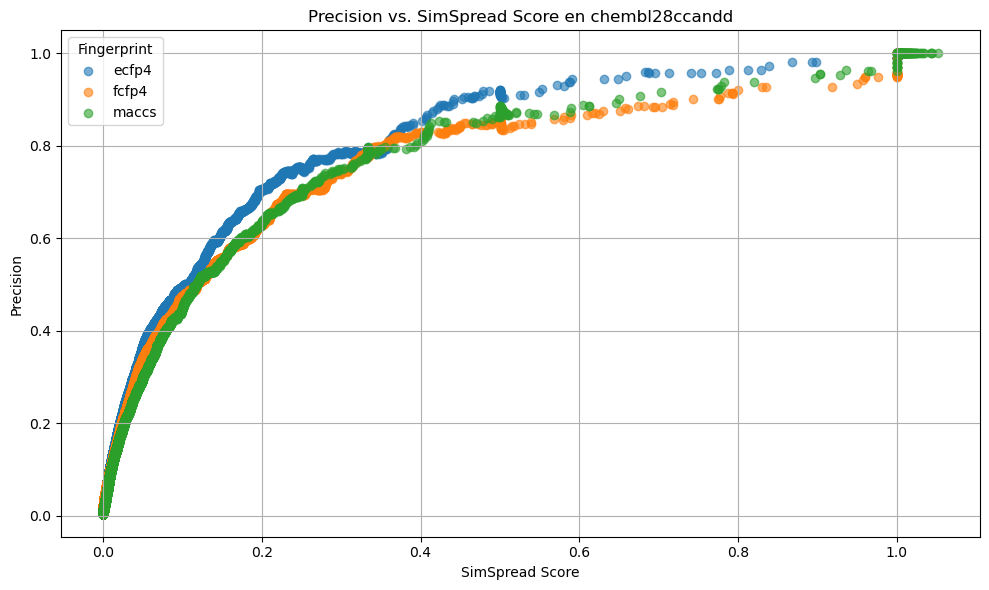

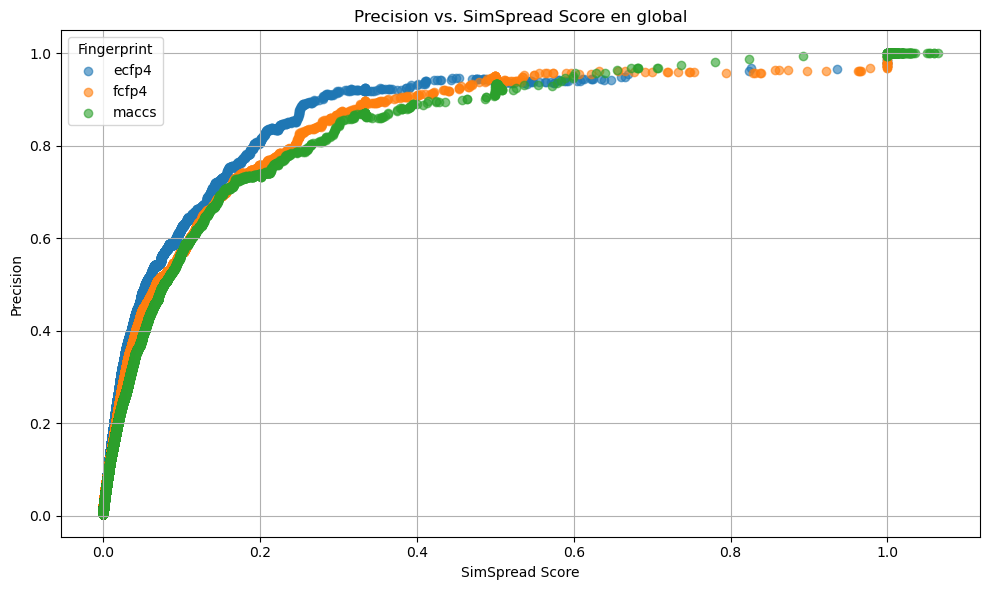

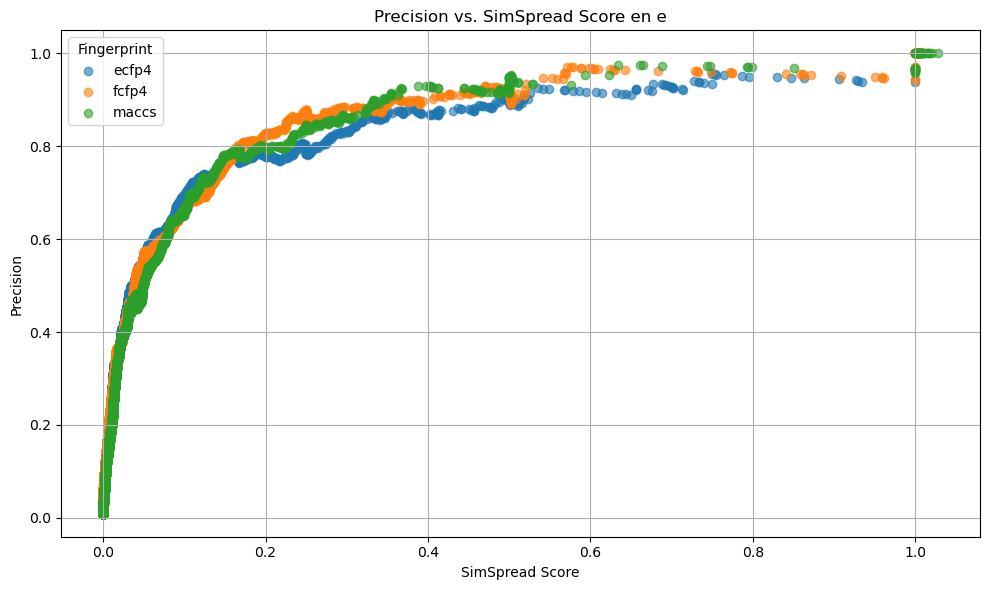

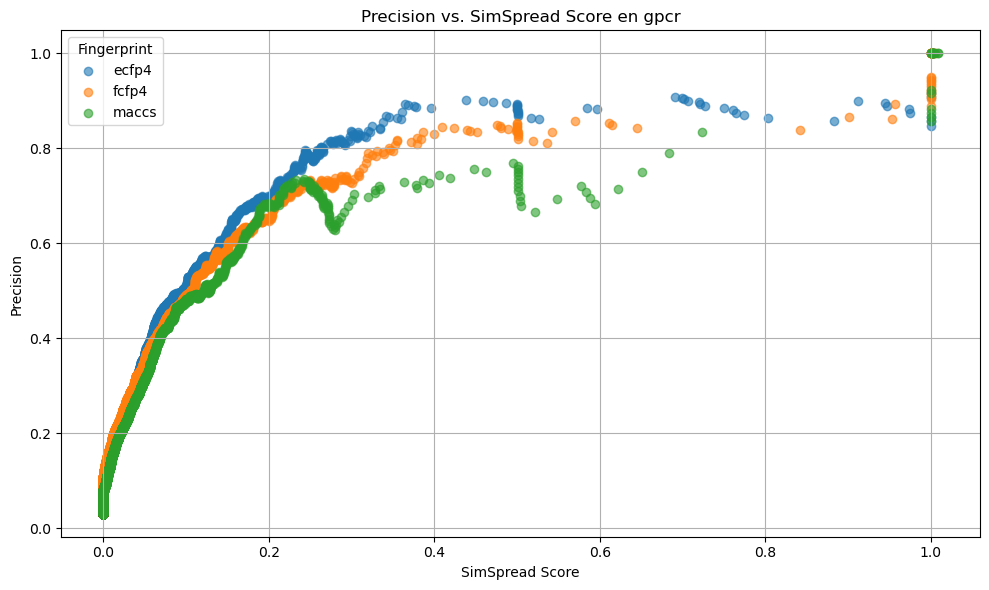

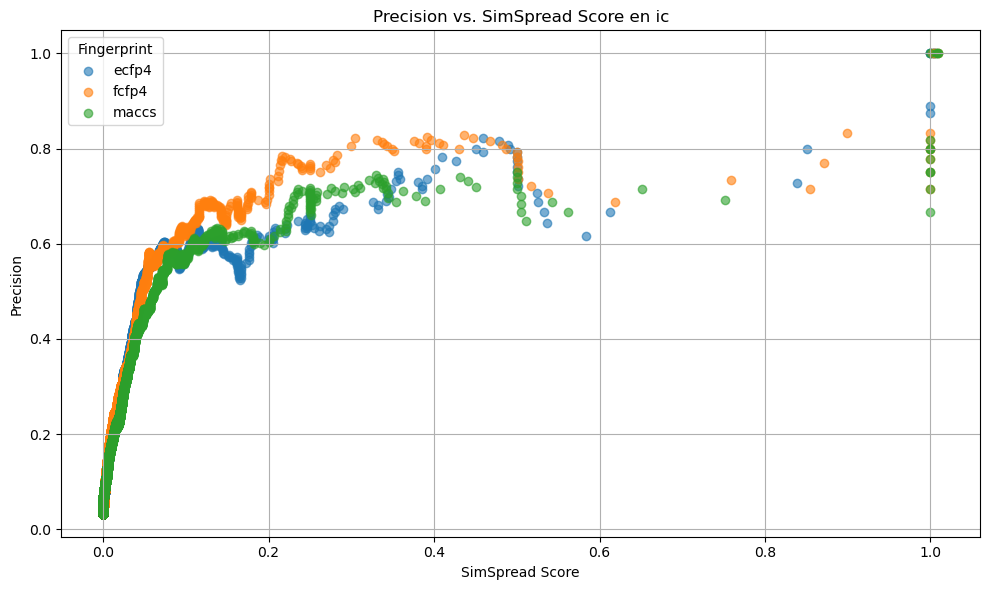

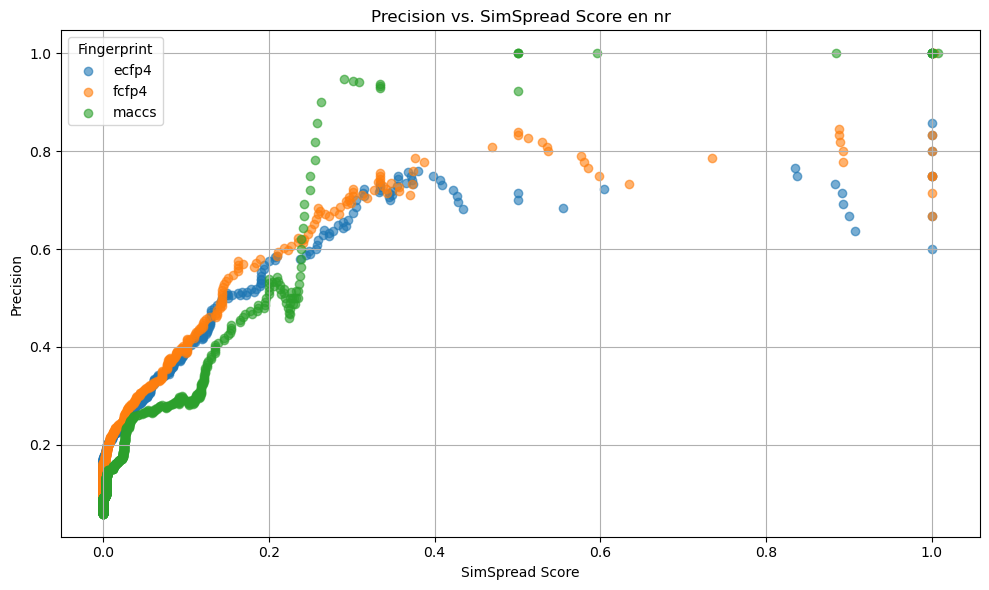

In [4]:
for db in DATA_BASE:
    ecfp4 = pd.read_csv(f"out/precision-loo/{db}_ecfp4_precision.csv")
    fcfp4 = pd.read_csv(f"out/precision-loo/{db}_fcfp4_precision.csv")
    maccs = pd.read_csv(f"out/precision-loo/{db}_maccs_precision.csv")

    plt.figure(figsize=(10, 6))
    plt.scatter(ecfp4['Score'], ecfp4['Precision'], alpha=0.6, label='ecfp4')
    plt.scatter(fcfp4['Score'], fcfp4['Precision'], alpha=0.6, label='fcfp4')
    plt.scatter(maccs['Score'], maccs['Precision'], alpha=0.6, label='maccs')

    plt.title(f'Precision vs. SimSpread Score en {db.split("-")[0].lower()}')
    plt.xlabel('SimSpread Score')
    plt.ylabel('Precision')
    plt.legend(title='Fingerprint')
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f'img/{db}_precision_score_pool_normalized.png', format='png', bbox_inches='tight')

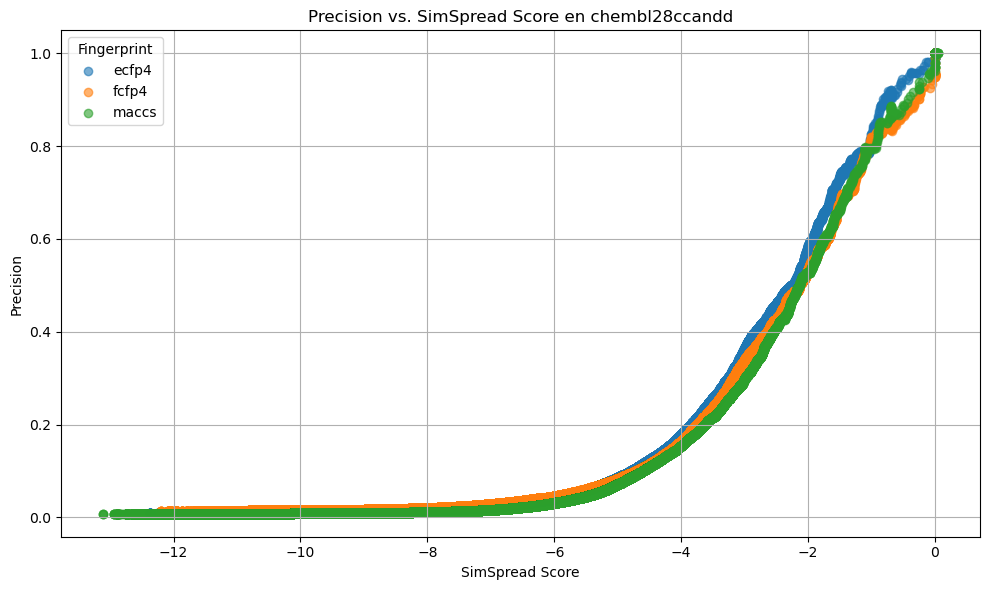

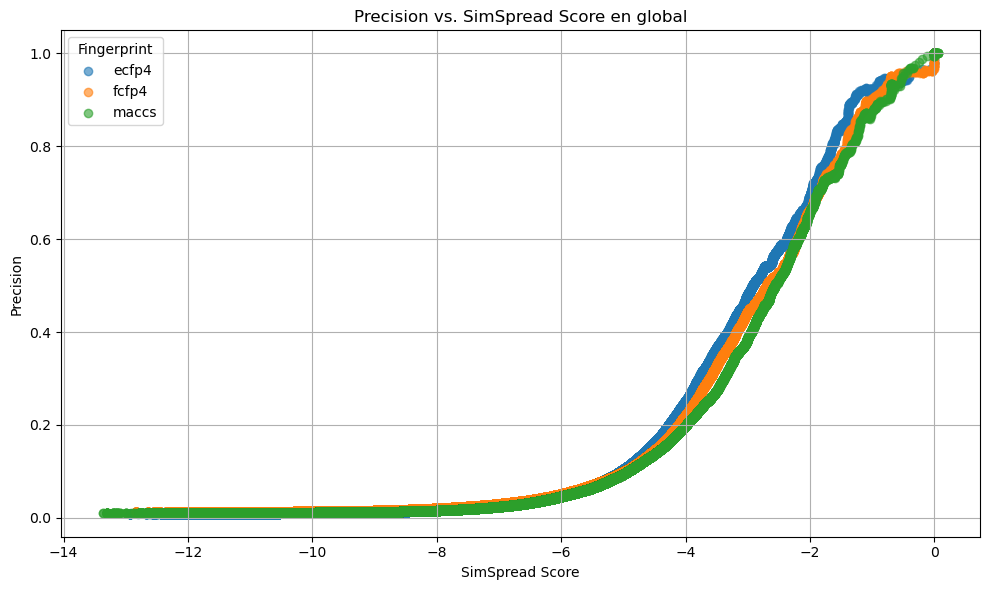

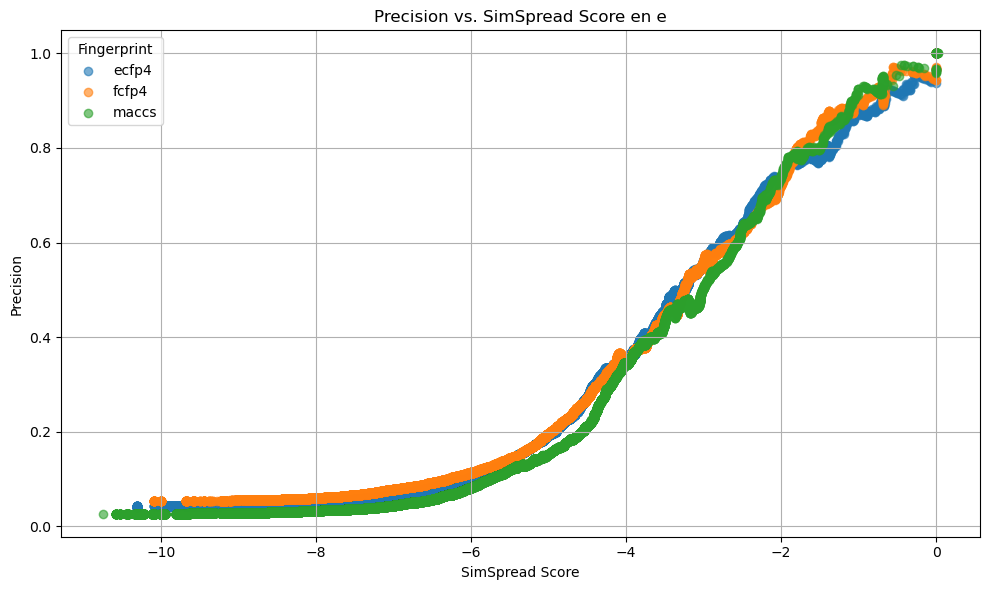

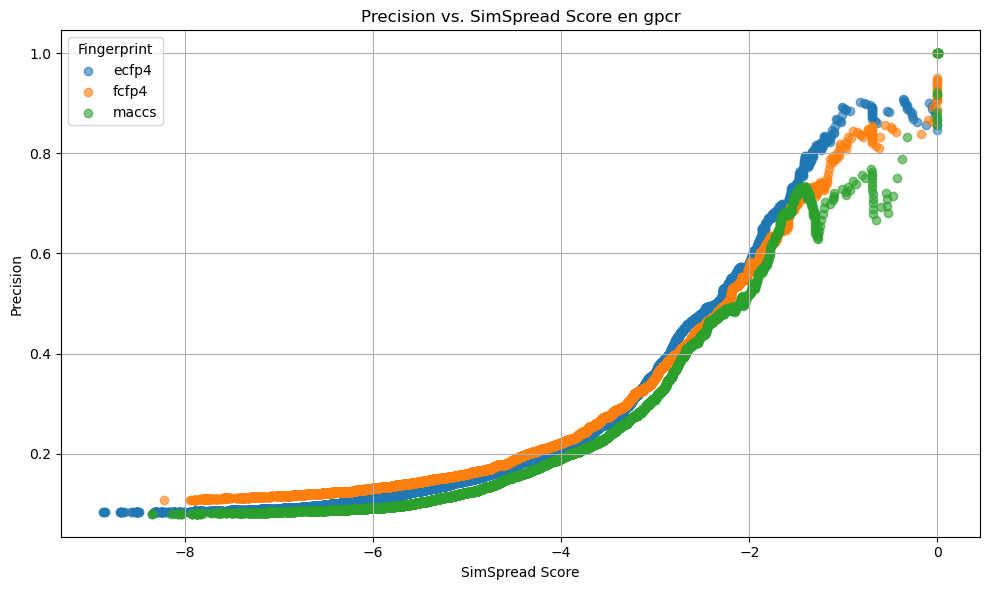

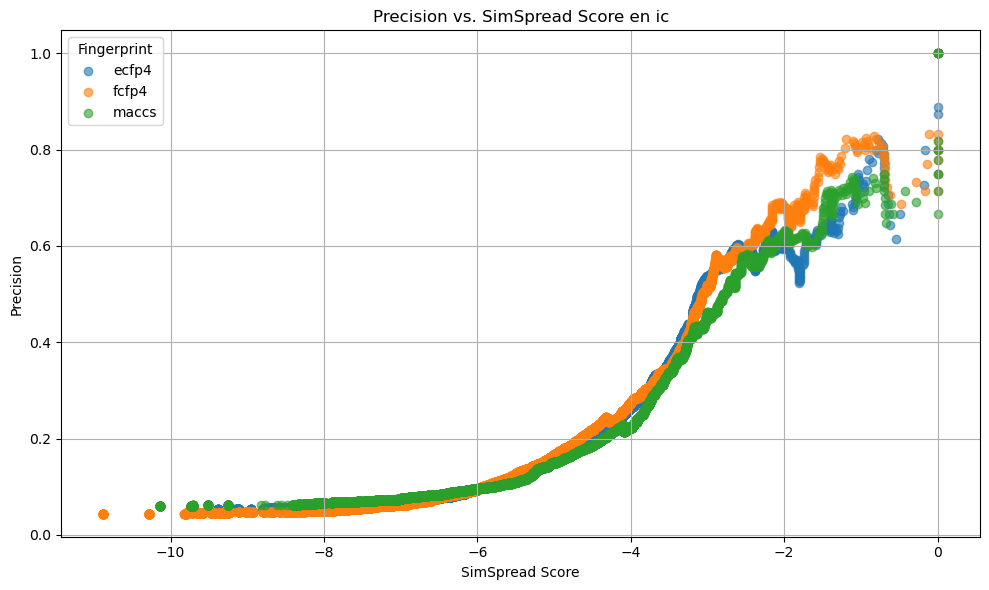

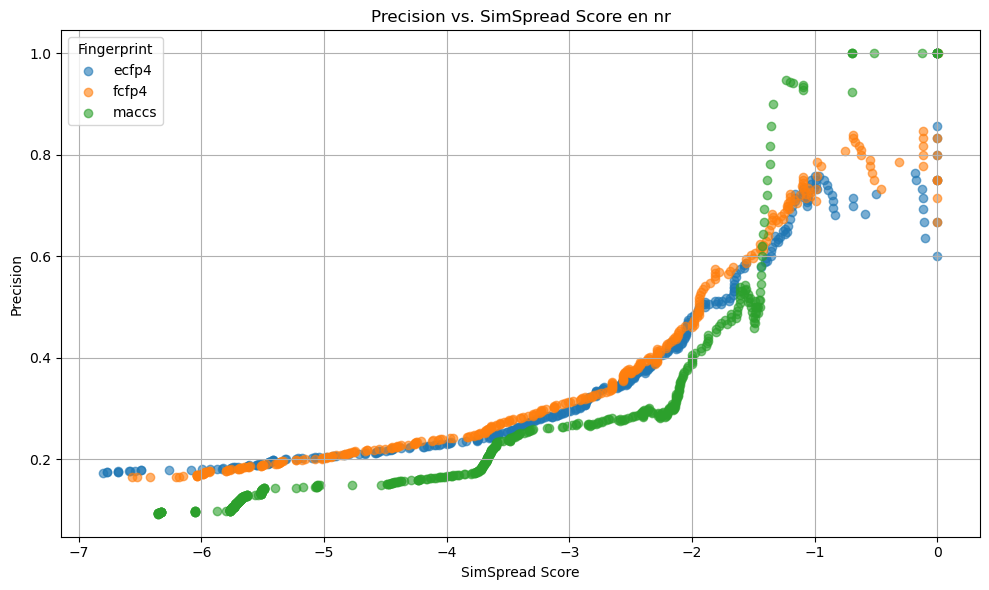

In [5]:
for db in DATA_BASE:
    ecfp4 = pd.read_csv(f"out/precision-loo-log-x/{db}_ecfp4_precision_log_x.csv")
    fcfp4 = pd.read_csv(f"out/precision-loo-log-x/{db}_fcfp4_precision_log_x.csv")
    maccs = pd.read_csv(f"out/precision-loo-log-x/{db}_maccs_precision_log_x.csv")

    plt.figure(figsize=(10, 6))
    plt.scatter(ecfp4['Score'], ecfp4['Precision'], alpha=0.6, label='ecfp4')
    plt.scatter(fcfp4['Score'], fcfp4['Precision'], alpha=0.6, label='fcfp4')
    plt.scatter(maccs['Score'], maccs['Precision'], alpha=0.6, label='maccs')

    plt.title(f'Precision vs. SimSpread Score en {db.split("-")[0].lower()}')
    plt.xlabel('SimSpread Score')
    plt.ylabel('Precision')
    plt.legend(title='Fingerprint')
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f'img/{db}_precision_score_pool_normalized_log_x.png', format='png', bbox_inches='tight')